# Final Project Phase 2

### Alicia Chen (ac2596), Stephanie Chow (sac342), Michelle Wang (mqw4)


## Introduction

What is the context of the work? What research question are you trying to answer? What are your main findings? 

Using datasets that catalogue information regarding K-pop songs, idols, and music videos, we want to identify major trends pertaining to the K-pop phenomenon. Three main research questions we are trying to answer are:
1. Are there any trends between songs sung by boy groups or girl groups in terms of their popularity?
2. What kinds of relationships exist between total likes on a MV verses their total views?
3. How can we compare the success between soloists versus groups in the K-pop scene?

## Data Description

Answer the following questions:
- What are the observations (rows) and the attributes (columns)?
- Why was this dataset created?
- Who funded the creation of the dataset?
- What processes might have influenced what data was observed and recorded and what was not?
- What preprocessing was done, and how did the data come to be in the form that you are using?
- If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
- Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 


The dataset we plan to use is the view count and likes for music videos (MVs) of big kpop groups. The observations are the different groups that have released at least one music video as of April 2020. The attributes are the artist, the song, the view count, the liked count, as well as the average like and view count for the corresponding kpop idols. The original dataset was created as a way for the user to showcase the trends of different idols and videos as they are released. The datasets we will be using are created by a site called aoimirai.net and is also accompanied with some aggregate data from the MCountdown chart (https://www.mwave.me/en/mcountdown/mcountdown-chart_) which holds the current top trending K-Pop songs. 

We created our corresponding dataset as a way to figure out if there are any trends among groups that tend to be popular, or if there are any unexpected values, such as artist who may have a large overall view count, but a low view count per video. These videos and counts are taken from Youtube, so the counts from other large media distribution sites are not included. This may influence the data because Youtube is the main platform used for "International Fans" (those who reside outside of South Korea) whereas Naver is the primary video distribution method in South Korea. Also. popularity of a group may not be based on views and like count of a Youtube video, as there may some songs or artist who rank differently in other sites, such as iTunes and Spotify. The raw source data can be found in the aoimirai site, including http://kpop.aoimirai.net/artists.html?options=1111&cols=101100011&hideone=1&ord=3D&limit=0 and http://kpop.aoimirai.net/mvs.html

The accompanying data from MCountdown could provide some interesting links between all-time popular song/music videos and those that are currently trending. A note to consider is that many of the current trending songs may have an overall smaller average view count and likes due to being released much later than their counterparts.

Dataset 1 filtered the artist data by removing the associated indexing that was attached to artist names presented. In addition, both datasets 1 and 2 used the alternative method of decimals as indicators for thousands and commas as indicators for decimals. As a result, we switched the two to stay in line with American standardization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from bs4 import BeautifulSoup
import re
from scipy.stats import t

In [2]:
# Dataset 1
# Source: kpop_vids_yt.htm

with open("kpop_mvs_1000_entries.htm", encoding = "utf8") as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")

In [3]:
for tr in soup.find_all("tr", class_ = "clickable"):
    td_list = tr.find("td").get_text()

print(td_list)

1000. Flash(dance)


In [4]:
def period_to_comma(old_array):
    new_array = []
    [new_array.append(i.replace(".", ",")) for i in old_array]
    return new_array

def comma_to_period(old_array):
    new_array = []
    [new_array.append(i.replace(",", ".")) for i in old_array]
    return new_array

def no_comma(data):
    return re.sub(",", "", data)

In [5]:
data = []
typeofartist = []
song_raw = []
artist = []

for tr in soup.find_all("tr", class_ = "clickable"):
    [data.append(td.get_text()) for td in tr.find_all("td")]
    typeofartist.append(tr.div['title'])

# indexing each value position
song_index, artist_index = 0, 1

while artist_index < len(data):
    song_raw.append(data[song_index])
    artist.append(re.sub(" ", "", data[artist_index]))
    song_index += 9
    artist_index += 9
    
arrlikes_raw=[]
arrviews_raw=[]
arrdays_raw = []

for views, likes, days in zip(soup.find_all("td", class_='c0'), soup.find_all("td", class_='c3'), soup.find_all("td", class_='c6')):
    arrlikes_raw.append(likes.get_text()[:])
    arrviews_raw.append(views.get_text()[:])
    arrdays_raw.append(days.get_text()[:])
    
arrlikes = period_to_comma(arrlikes_raw)
arrviews = period_to_comma(arrviews_raw)
arrdays = period_to_comma(arrdays_raw)

In [6]:
# cleaning song name data without numbers
songs = []
for song in song_raw:
    replace_num = re.sub('\d+. ', '', song)
    songs.append(replace_num.strip())

# cleaning likes data and splitting into two parts
likes_total_raw = []
likes_ratio_raw = []

for likes in arrlikes:
    likes_total_raw.append(re.sub(' \(\d+,\d+%\)', "", likes))
    ratio = re.findall('(\d+,\d+%)', likes)
    likes_ratio_raw.append(ratio[0])

likes_total = period_to_comma(likes_total_raw)
likes_ratio = comma_to_period(likes_ratio_raw)

days = []
for day in arrdays:
    new_days = re.sub(" days", "", day)
    days.append(no_comma(new_days))
    
arryears = np.array(days, dtype="float")
arryears = arryears/365

In [7]:
df = pd.DataFrame({"Song Title": songs, 
                   "Artist": artist, 
                   "Type of Artist": typeofartist, 
                   "MV Views": arrviews, 
                   "Likes": likes_total, 
                   "Likes Ratio": likes_ratio,
                   "Days Old" : arrdays_raw,
                   "Years Old" : arryears
                  })
categories = ["Song Title", "Artist", "Type of Artist", "Likes", "Likes Ratio", "MV Views", "Days Old", "Years Old"]
df = df.reindex(columns = categories)
df.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old
0,Gangnam Style,PSY,male soloist,"17,848,966",88.2%,"3,612,465,662",2.859 days,7.832877
1,Boy with luv,BTS,male group,"14,942,987",94.3%,"776,602,125",397 days,1.087671
2,DNA,BTS,male group,"13,257,145",94.9%,"978,195,463",968 days,2.652055
3,Kill this Love,Blackpink,female group,"12,920,236",93.9%,"826,027,265",405 days,1.109589
4,Ddu-du Ddu-du,Blackpink,female group,"12,544,634",94.5%,"1,144,730,047",698 days,1.912329


In [8]:
# Dataset 2

with open("kpop_artists_300_entries.htm", encoding = "utf8") as file_reader:
    soup2 = BeautifulSoup(file_reader, "lxml")

In [9]:
def strip_numbers(data, lst):
    counter = 0
    while counter < len(data):
        replace_num = re.sub('\d+. ', '', data[counter])
        no_space = re.sub(' ', '', replace_num)
        lst.append(no_space)
        counter += 9

data = []
typeofartist = []
artist = []

for tr in soup2.find_all("tr", class_ = "clickable"):
    [data.append(td.get_text()) for td in tr.find_all("td")]
    typeofartist.append(tr.div['title'])
    
strip_numbers(data, artist)

In [10]:
arrlikes_raw=[]
arrsales_raw=[]
arrviews_raw=[]

for views, likes, sales in zip(soup2.find_all("td", class_='c0'), soup2.find_all("td", class_='c7'), soup2.find_all("td", class_='c8')):
    arrlikes_raw.append(likes.get_text()[:])
    arrsales_raw.append(sales.get_text()[:-3])
    arrviews_raw.append(views.get_text()[:])

arrlikes = period_to_comma(arrlikes_raw)
arrsales = period_to_comma(arrsales_raw)
arrviews = period_to_comma(arrviews_raw)

need = pd.DataFrame({"Artist": artist, 
                    "Type of Artist": typeofartist, 
                    "Total Views": arrviews, 
                    "Likes/MV": arrlikes, 
                    "Sales": arrsales})
categories = [ "Artist", "Type of Artist", "Likes/MV", "Sales", "Total Views"]
need = need.reindex(columns = categories)
need.head()

,Artist,Type of Artist,Likes/MV,Sales,Total Views
0,BTS(방탄소년단),male group,"2,400,603","21,047,066","11,914,564,663"
1,Blackpink(블랙핑크),female group,"3,495,869","652,585","6,236,964,281"
2,Twice(트와이스),female group,"951,944","4,572,592","5,119,889,077"
3,EXO(엑소),male group,"1,285,821","10,273,845","2,690,343,428"
4,GOT7(갓세븐),male group,"534,887","3,386,454","2,077,803,857"


In [11]:
new_data = []
for tr in soup2.find_all("tr", class_ = "clickable"):  
    row = tr.find('td')
    small = row.small
    if type(small) != type(None):
        small.decompose()
    [new_data.append(td.get_text()) for td in tr.find_all("td")]

artists = []
strip_numbers(new_data, artists)

new = need.copy()
new['Artist'] = artists
new.head()

,Artist,Type of Artist,Likes/MV,Sales,Total Views
0,BTS,male group,"2,400,603","21,047,066","11,914,564,663"
1,Blackpink,female group,"3,495,869","652,585","6,236,964,281"
2,Twice,female group,"951,944","4,572,592","5,119,889,077"
3,EXO,male group,"1,285,821","10,273,845","2,690,343,428"
4,GOT7,male group,"534,887","3,386,454","2,077,803,857"


In [12]:
combined_data = pd.merge(df, new)
combined_data.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,Gangnam Style,PSY,male soloist,"17,848,966",88.2%,"3,612,465,662",2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
1,Gentleman,PSY,male soloist,"6,007,998",87.3%,"1,312,037,506",2.587 days,7.087671,"1,997,592","518,974","6,054,464,700"
2,Daddy,PSY,male soloist,"3,799,519",93.8%,"493,121,830",1.626 days,4.454795,"1,997,592","518,974","6,054,464,700"
3,New Face,PSY,male soloist,"1,581,019",95.0%,"205,665,596",1.099 days,3.010959,"1,997,592","518,974","6,054,464,700"
4,I Luv it,PSY,male soloist,"973,795",94.7%,"101,822,612",1.099 days,3.010959,"1,997,592","518,974","6,054,464,700"


In [13]:
combined_data.to_csv('combined.csv')

In [14]:
replace_likes = []
likes_column = combined_data['Likes']
for like in likes_column:
    replace_likes.append(no_comma(like))
    
replace_views = []
views_column = combined_data['MV Views']
for view in views_column:
    replace_views.append(no_comma(view))

In [15]:
replace_likes = np.array(replace_likes, dtype="int64")
replace_views = np.array(replace_views, dtype="int64")
combined_data['Likes'] = replace_likes
combined_data['MV Views'] = replace_views
sorted_byLikes = combined_data.sort_values("Likes", axis=0, ascending=False)
sorted_byLikes.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,Gangnam Style,PSY,male soloist,17848966,88.2%,3612465662,2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
7,Boy with luv,BTS,male group,14942987,94.3%,776602125,397 days,1.087671,"2,400,603","21,047,066","11,914,564,663"
8,DNA,BTS,male group,13257145,94.9%,978195463,968 days,2.652055,"2,400,603","21,047,066","11,914,564,663"
103,Kill this Love,Blackpink,female group,12920236,93.9%,826027265,405 days,1.109589,"3,495,869","652,585","6,236,964,281"
104,Ddu-du Ddu-du,Blackpink,female group,12544634,94.5%,1144730047,698 days,1.912329,"3,495,869","652,585","6,236,964,281"


In [16]:
sorted_byViews = combined_data.sort_values("MV Views", axis=0, ascending=False)
sorted_byViews.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,Gangnam Style,PSY,male soloist,17848966,88.2%,3612465662,2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
1,Gentleman,PSY,male soloist,6007998,87.3%,1312037506,2.587 days,7.087671,"1,997,592","518,974","6,054,464,700"
104,Ddu-du Ddu-du,Blackpink,female group,12544634,94.5%,1144730047,698 days,1.912329,"3,495,869","652,585","6,236,964,281"
8,DNA,BTS,male group,13257145,94.9%,978195463,968 days,2.652055,"2,400,603","21,047,066","11,914,564,663"
105,Boombayah,Blackpink,female group,7561192,95.3%,849999809,1.374 days,3.764384,"3,495,869","652,585","6,236,964,281"


In [17]:
sorted_byRatio = combined_data.sort_values("Likes Ratio", ascending=False)
sorted_byRatio.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
456,Miroh(dance),StrayKids,male group,389016,99.8%,5001411,402 days,1.101370,"479,271","1,026,466","654,638,916"
476,Boom(alternate),NCTDREAM,male group,303676,99.8%,2949506,278 days,0.761644,"433,529","1,048,154","353,880,465"
433,Coming Home,NCTU,male group,358959,99.8%,3907620,152 days,0.416438,"672,391",0,"376,266,781"
454,N/S,StrayKids,male group,428638,99.8%,7447947,539 days,1.476712,"479,271","1,026,466","654,638,916"
455,TMT,StrayKids,male group,405295,99.8%,5523195,317 days,0.868493,"479,271","1,026,466","654,638,916"


## Data Analysis

- Use summary functions like mean and standard deviation along with visual displays like scatter plots and histograms to describe data.
- Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.

Music Video Views vs. Likes:


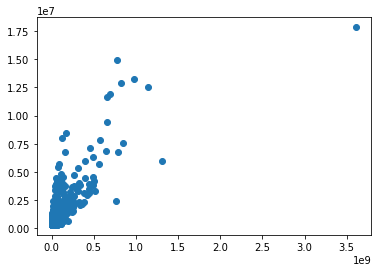

In [64]:
print('Music Video Views vs. Likes:')
plt.scatter(sorted_byViews_ascending['MV Views'], sorted_byViews_ascending['Likes'])
plt.show()

Female Groups:
Correlation Coefficient between MV Views and Likes: 0.9202292639988282
Slope: 0.00953676204451341
Intercept: 177261.15103183768
Score: 0.8468218983198252
Mean number of MV views: 85767907.44202898
Standard deviation of MV Views: 133385682.00802307
Mean number of Likes: 995209.2753623188
Standard deviation of Likes:1382337.5969678676

Male groups:
Correlation Coefficient between MV Views and Likes: 0.8529617896293398
Slope: 0.013108893485631011
Intercept: 409048.68383956247
Score: 0.7275438145676862
Mean number of MV views: 60958127.31481481
Standard deviation of MV Views: 107085789.3417437
Mean number of Likes: 1208142.2818930042
Standard deviation of Likes: 1645766.8132070233

Coed groups:
Correlation Coefficient between MV Views and Likes: 0.8016360871271917
Slope:0.0028390120762925098
Intercept: 473630.7708508823
Score: 0.6426204161845945
Mean number of MV views: 64761759.86486486
Standard deviation of MV Views: 124320794.22458468
Mean number of Likes: 657490.18918918

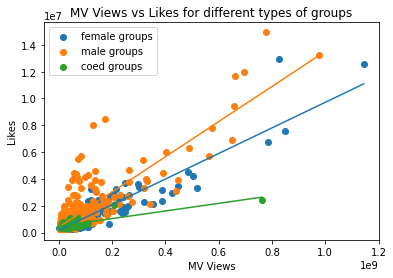

In [18]:
sorted_byViews_ascending = combined_data.sort_values("MV Views", axis=0, ascending=True)

female_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "female group"]
male_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "male group"]
coed_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "coed group"]

plt.scatter(female_groups['MV Views'], female_groups['Likes'], label="female groups")
plt.scatter(male_groups['MV Views'], male_groups['Likes'], label="male groups")
plt.scatter(coed_groups['MV Views'], coed_groups['Likes'], label="coed groups")

model = LinearRegression()
model.fit(female_groups[['MV Views']], female_groups[['Likes']])
y_pred = model.predict(female_groups[['MV Views']])
plt.plot(female_groups['MV Views'], y_pred)
female_mv_likes = model.coef_[0][0]

print("Female Groups:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(female_groups['MV Views'], female_groups['Likes'])[0][1])
print("Slope: " + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(female_groups[['MV Views']], female_groups[['Likes']])))

print("Mean number of MV views: " + str(female_groups['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(female_groups['MV Views'].std()))

print("Mean number of Likes: " + str(female_groups['Likes'].mean()))
print("Standard deviation of Likes:" + str(female_groups['Likes'].std()) +  "\n")

model = LinearRegression()
model.fit(male_groups[['MV Views']], male_groups[['Likes']])
y_pred = model.predict(male_groups[['MV Views']])
plt.plot(male_groups['MV Views'], y_pred)
male_mv_likes = model.coef_[0][0]

print("Male groups:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(male_groups['MV Views'], male_groups['Likes'])[0][1])
print("Slope: " + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(male_groups[['MV Views']], male_groups[['Likes']])))

print("Mean number of MV views: " + str(male_groups['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(male_groups['MV Views'].std()))

print("Mean number of Likes: " + str(male_groups['Likes'].mean()))
print("Standard deviation of Likes: " + str(male_groups['Likes'].std()) + '\n')

model = LinearRegression()
model.fit(coed_groups[['MV Views']], coed_groups[['Likes']])
y_pred = model.predict(coed_groups[['MV Views']])
plt.plot(coed_groups['MV Views'], y_pred)
coed_mv_likes = model.coef_[0][0]

print("Coed groups:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(coed_groups['MV Views'], coed_groups['Likes'])[0][1])
print("Slope:" + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(coed_groups[['MV Views']], coed_groups[['Likes']])))

print("Mean number of MV views: " + str(coed_groups['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(coed_groups['MV Views'].std()))

print("Mean number of Likes: " + str(coed_groups['Likes'].mean()))
print("Standard deviation of Likes: " + str(coed_groups['Likes'].std()) + "\n")

plt.legend()
plt.xlabel("MV Views")
plt.ylabel("Likes")
plt.title("MV Views vs Likes for different types of groups")
plt.show()

0.01081864406239532
Groups:
Correlation Coefficient between MV Views and Likes: 0.8360590874189195
Slope: 0.01081864406239532
Intercept: 354982.34210651205
Score: 0.6989947976557568
Mean number of MV views: 69704352.24530663
Standard deviation of MV Views: 118046465.8129733
Mean number of Likes: 1109088.9186483105
Standard deviation of Likes: 1527526.8407128318

Soloists:
Correlation Coefficient between MV Views and Likes: 0.8785744470514014
Slope:0.004924510900483625
Intercept: 613980.4303706298
Score: 0.7718930590116762
Mean number of MV views: 72609416.38121547
Standard deviation of MV Views: 287344310.4429597
Mean number of Likes: 971546.2928176796
Standard deviation of Likes: 1610597.9336381939


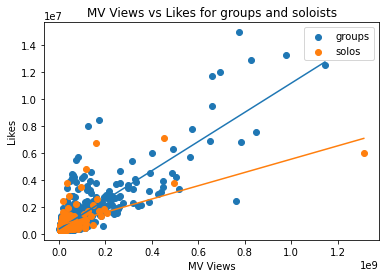

In [19]:
groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'].str.contains("group")]
solos=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'].str.contains("soloist")]

plt.scatter(groups['MV Views'], groups['Likes'], label="groups")
plt.scatter(solos['MV Views'][:-1], solos['Likes'][:-1], label="solos")

model = LinearRegression()
model.fit(groups[['MV Views']], groups[['Likes']])
y_pred = model.predict(groups[['MV Views']])
plt.plot(groups['MV Views'], y_pred)
groups_mv_likes = model.coef_[0][0]
print(groups_mv_likes)

print("Groups:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(groups['MV Views'], groups['Likes'])[0][1])
print("Slope: " + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(groups[['MV Views']], groups[['Likes']])))
print("Mean number of MV views: " + str(groups['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(groups['MV Views'].std()))
print("Mean number of Likes: " + str(groups['Likes'].mean()))
print("Standard deviation of Likes: " + str(groups['Likes'].std()) + "\n")

model = LinearRegression()
model.fit(solos[['MV Views']], solos[['Likes']])
y_pred = model.predict(solos[['MV Views']])
plt.plot(solos['MV Views'][:-1], y_pred[:-1])
solos_mv_likes = model.coef_[0][0]

print("Soloists:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(solos['MV Views'], solos['Likes'])[0][1])
print("Slope:" + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(solos[['MV Views']], solos[['Likes']])))
print("Mean number of MV views: " + str(solos['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(solos['MV Views'].std()))
print("Mean number of Likes: " + str(solos['Likes'].mean()))
print("Standard deviation of Likes: " + str(solos['Likes'].std()))

plt.legend()
plt.xlabel("MV Views")
plt.ylabel("Likes")
plt.title("MV Views vs Likes for groups and soloists")
plt.show()

In [65]:
model = LinearRegression().fit(sorted_byViews_ascending[['MV Views']], sorted_byViews_ascending[['Likes']])
mv_vs_likes_slope = model.coef_[0][0]
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(combined_data['MV Views'], combined_data['Likes'])[0][1])
print('Slope:', model.coef_[0][0])
print('Intercept:', model.intercept_[0])
print('Score:', model.score(combined_data[['MV Views']], combined_data[['Likes']]))

print("Mean number of MV views: " + str(combined_data['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(combined_data['MV Views'].std()))

print("Mean number of Likes: " + str(combined_data['Likes'].mean()))
print("Standard deviation of Likes: " + str(combined_data['Likes'].std()))

Correlation Coefficient between MV Views and Likes: 0.7858616410112756
Slope: 0.007444518531224244
Intercept: 560775.9575061544
Score: 0.6175785188129357
Mean number of MV views: 70240899.80510204
Standard deviation of MV Views: 162913230.1802108
Mean number of Likes: 1083685.637755102
Standard deviation of Likes: 1543287.644753205


Age of Music Video vs. Music Video Views:
Correlation: 0.16743591886318027
Slope: 11370004.653302517
Intercept: 35141374.3974525
Score: 0.02803478692555772
Age of Music Video vs. Music Video Views:


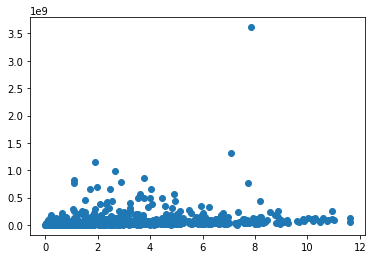

In [22]:
age = sorted_byViews["Years Old"]
views = sorted_byViews["MV Views"]

model = LinearRegression().fit(sorted_byViews[["Years Old"]], sorted_byViews[["MV Views"]])
age_vs_views_slope = model.coef_[0][0]

print("Age of Music Video vs. Music Video Views:")
print("Correlation:", np.corrcoef(age, views)[0][1])
print("Slope:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])
print("Score:", model.score(sorted_byViews[["Years Old"]], sorted_byViews[["MV Views"]]))

print('Age of Music Video vs. Music Video Views:')
plt.scatter(age, views)
plt.show()

## Evaluation of Significance

Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 

In [61]:
def permuted_y(array):
    return np.random.permutation(array.copy())

# params
# xarray = x dataframe col from model
# yarray = y dataframe col from model
# slopes = slope array to fill
# original_slope = original slope
def get_steeper_slopes(xarray, yarray, slopes, original_slope):
    steeper_slopes = 0
    for i in range(len(slopes)):
        fake_y = permuted_y(yarray)
        lr = LinearRegression().fit(xarray, fake_y)
        fake_slope = lr.coef_[0]
        slopes[i] = fake_slope
        if np.abs(fake_slope) > np.abs(original_slope):
            steeper_slopes += 1
    print("Number of steeper slopes: {}".format(steeper_slopes))
    plt.hist(reg_slopes, bins = 30)
    plt.show()
    return steeper_slopes
            
def get_standard_error(x, y, predict):
    mean_x = np.mean(x)
    sum_x_squared = np.sum((x - mean_x) ** 2)
    sum_squared_error = np.sum((y - predict) ** 2)
    return np.sqrt(sum_squared_error / (len(x) - 2)) / np.sqrt(sum_x_squared)

# params
# slopes = filled slope array of length 1000
# std_error = array from get_standard_error
# original_slope = original slope
# df = number of x values - 2
# steeper_slopes = count of steeper slopes
def plot_t_disb(slopes, std_error, original_slope, df_val, steeper_slopes):
    bins = np.linspace( -5, 5, 30) #left edges of bins
    n, bins, patches = plt.hist(slopes / std_error, bins = bins)
    for b, p in zip(bins, patches):
        if b >= original_slope:
            p.set_color("red") #steeper slopes

        else:
            p.set_color("darkblue")

    plt.plot(bins, t.pdf(bins, df = df_val) * 1000 * (bins[1] - bins[0]))
    plt.show()
    
    print("Percent of steeper slopes:", steeper_slopes / 2 / 1000)
    print("t distribution:", 1 - t.cdf(original_slope / std_error, df = df_val))
#     print("Percent of steeper slopes:\t{}".format(steeper_slopes / 2 / 1000))
#     print("t distribution: {:3f}".format(1 - t.cdf(original_slope / std_error, df = df_val)))

In [57]:
#original slopes
print(groups_mv_likes)
print(solos_mv_likes)
print(female_mv_likes)
print(male_mv_likes)
print(mv_vs_likes_slope)
print(age_vs_views_slope)

0.01081864406239532
0.004924510900483625
0.00953676204451341
0.013108893485631011
0.007444518531224244
11370004.653302517


### MVs vs Likes for K-pop Groups

MVs vs Likes for K-pop Groups Randomization
Number of steeper slopes: 0


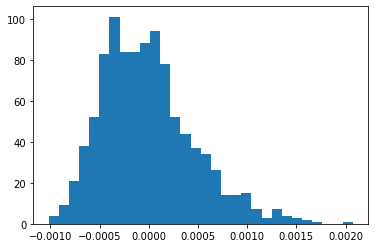

0.0002514743538771832


In [63]:
reg_slopes = np.zeros(1000)
print("MVs vs Likes for K-pop Groups Randomization")
steeper_slopes = get_steeper_slopes(groups[['MV Views']], groups['Likes'], reg_slopes, groups_mv_likes)
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
t_model = LinearRegression().fit(groups[['MV Views']], groups['Likes'])
std_error = get_standard_error(groups["MV Views"],
                               groups["Likes"],
                               t_model.predict(groups[["MV Views"]]))

print(std_error)

Visual of % of Steeper slopes between MV Views and Likes


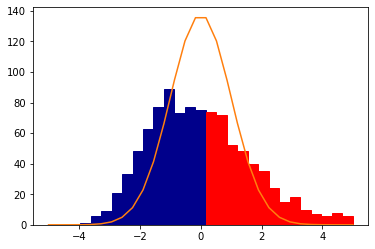

Percent of steeper slopes: 0.0
t distribution: 0.0


In [55]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(groups[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, groups_mv_likes, df_val, steeper_slopes)

### MVs vs Likes for K-pop Solos

MVs vs Likes for K-pop Solos
Number of steeper slopes: 0


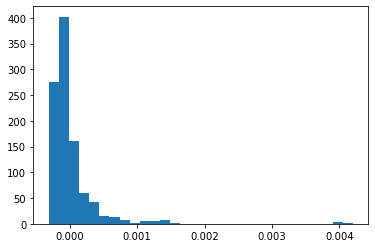

Standard error: 0.00020009086882648771


In [45]:
reg_slopes = np.zeros(1000)
print("MVs vs Likes for K-pop Solos")
steeper_slopes = get_steeper_slopes(solos[['MV Views']], solos['Likes'], reg_slopes, solos_mv_likes)
t_model = LinearRegression().fit(solos[["MV Views"]], solos["Likes"])
std_error = get_standard_error(solos["MV Views"],
                               solos["Likes"],
                               t_model.predict(solos[["MV Views"]]))
print("Standard error:", std_error)

Visual of % of Steeper slopes between MV Views and Likes


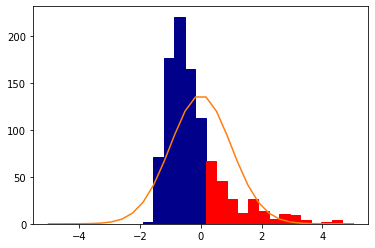

Percent of steeper slopes:	0.0
t distribution: 0.000000


In [46]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(solos[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, solos_mv_likes, df_val, steeper_slopes)

### MVs vs Likes for Female K-pop

MVs vs Likes for Female K-pop
Number of steeper slopes: 0


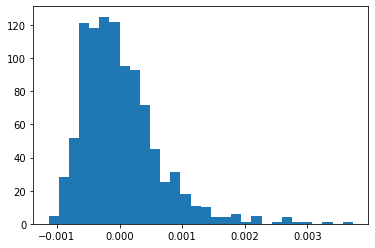

Standard error: 0.00024503491231347757


In [47]:
reg_slopes = np.zeros(1000)
print("MVs vs Likes for Female K-pop")
steeper_slopes = get_steeper_slopes(female_groups[['MV Views']], female_groups['Likes'], reg_slopes, female_mv_likes)
t_model = LinearRegression().fit(female_groups[["MV Views"]], female_groups["Likes"])
std_error = get_standard_error(female_groups["MV Views"],
                               female_groups["Likes"],
                               t_model.predict(female_groups[["MV Views"]]))

print("Standard error:", std_error)

Visual of % of Steeper slopes between MV Views and Likes


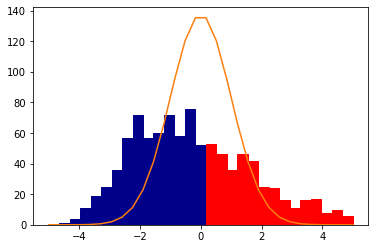

Percent of steeper slopes:	0.0
t distribution: 0.000000


In [48]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(female_groups[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, female_mv_likes, df_val, steeper_slopes)

### MVs vs Likes for Male K-pop

Total MV Views vs Likes Randomization
Number of steeper slopes: 0


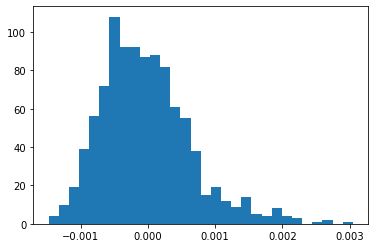

Standard error: 0.0003646381575473369


In [49]:
reg_slopes = np.zeros(1000)
print("Total MV Views vs Likes Randomization")
steeper_slopes = get_steeper_slopes(male_groups[['MV Views']], male_groups['Likes'], reg_slopes, male_mv_likes)
t_model = LinearRegression().fit(male_groups[["MV Views"]], male_groups["Likes"])
std_error = get_standard_error(male_groups["MV Views"],
                               male_groups["Likes"],
                               t_model.predict(male_groups[["MV Views"]]))
print("Standard error:", std_error)

Visual of % of Steeper slopes between MV Views and Likes


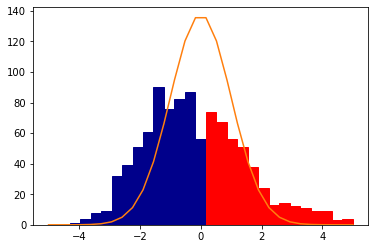

Percent of steeper slopes:	0.0
t distribution: 0.000000


In [50]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(male_groups[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, male_mv_likes, df_val, steeper_slopes)

### MVs vs Likes for Coed K-pop

Total MV Views vs Likes Randomization
Number of steeper slopes: 0


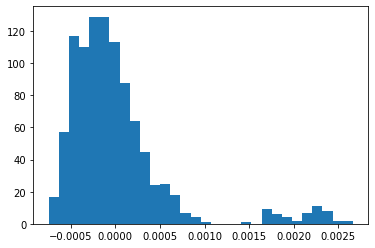

Standard error: 0.00035786632012271944


In [51]:
reg_slopes = np.zeros(1000)
print("Total MV Views vs Likes Randomization")
steeper_slopes = get_steeper_slopes(coed_groups[['MV Views']], coed_groups['Likes'], reg_slopes, coed_mv_likes)
t_model = LinearRegression().fit(coed_groups[["MV Views"]], coed_groups["Likes"])
std_error = get_standard_error(coed_groups["MV Views"],
                               coed_groups["Likes"],
                               t_model.predict(coed_groups[["MV Views"]]))
print("Standard error:", std_error)

Visual of % of Steeper slopes between MV Views and Likes


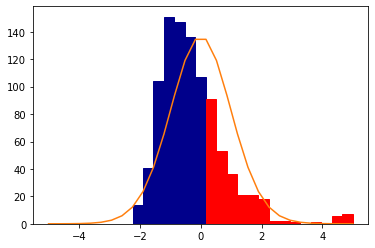

Percent of steeper slopes:	0.0
t distribution: 0.000000


In [34]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(coed_groups[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, coed_mv_likes, df_val, steeper_slopes)

### MVs vs Likes for All K-pop

Number of steeper slopes: 0


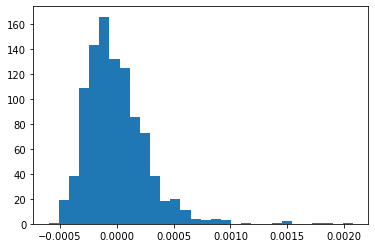

Standard error: 0.00018732348840678955


In [35]:
reg_slopes = np.zeros(1000)
steeper_slopes = get_steeper_slopes(sorted_byViews[['MV Views']], sorted_byViews['Likes'], reg_slopes, mv_vs_likes_slope)
t_model = LinearRegression().fit(sorted_byViews[["MV Views"]], sorted_byViews["Likes"])
std_error = get_standard_error(sorted_byViews["MV Views"],
                               sorted_byViews["Likes"],
                               t_model.predict(sorted_byViews[["MV Views"]]))
print("Standard error:", std_error)

Visual of % of Steeper slopes between MV Views and Likes


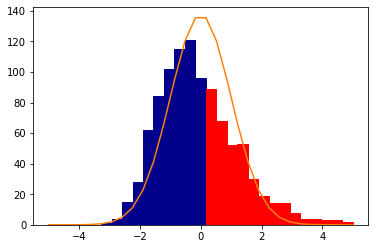

Percent of steeper slopes:	0.0
t distribution: 0.000000


In [36]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(sorted_byViews[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, mv_vs_likes_slope, df_val, steeper_slopes)

### How old MV is vs MV Views

Age of Music Video vs. Music Video Views: Randomization
Number of steeper slopes: 0


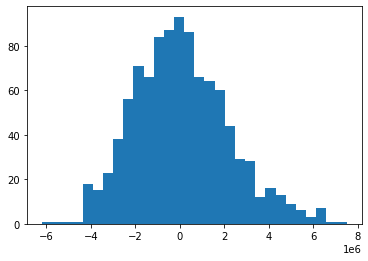

Standard error: 2140759.825766173


In [37]:
reg_slopes = np.zeros(1000)
print("Age of Music Video vs. Music Video Views: Randomization")
steeper_slopes = get_steeper_slopes(sorted_byViews[["Years Old"]], sorted_byViews["MV Views"], reg_slopes, age_vs_views_slope)
t_model = LinearRegression().fit(sorted_byViews[["Years Old"]], sorted_byViews["MV Views"])
std_error = get_standard_error(sorted_byViews["Years Old"],
                               sorted_byViews["MV Views"],
                               t_model.predict(sorted_byViews[["Years Old"]]))
print("Standard error:", std_error)

Visual of % of Steeper slopes between MV Views and Likes


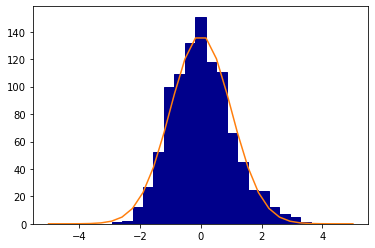

Percent of steeper slopes:	0.0
t distribution: 0.000000


In [38]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(sorted_byViews[["Years Old"]]) - 2
plot_t_disb(reg_slopes, std_error, age_vs_views_slope, df_val, steeper_slopes)

## Conclusion

What did you find over the course of your data analysis, and how confident are you in these conclusions? Interpret these results in the wider context of the real-life application from where your data hails.

## Source Code

Provide a link to your Github repository (or other file hosting site) that has all of your project code (if applicable). For example, you might include web scraping code or data filtering and aggregation code.

## Acknowledgements

Recognize any people or online resources that you found helpful. These can be tutorials, software packages, Stack Overflow questions, peers, and data sources. Showing gratitude is a great way to feel happier! But it also has the nice side-effect of reassuring us that you're not passing off someone else's work as your own. Crossover with other courses is permitted and encouraged, but it must be clearly stated, and it must be obvious what parts were and were not done for 2950. Copying without attribution robs you of the chance to learn, and wastes our time investigating.